In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [4]:
# Loading Data
df_train = pd.read_csv('CreditTraining.csv')


In [5]:
df_train.shape

(5380, 19)

In [14]:
df_train[:]

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,Non Existing Client,09/04/1976,19/10/2011,NP_Client,University,Married,2.0,1,36,1.0,G,25/11/2011,Sales,Owned,1,NaN,C
5376,1358,1,Existing Client,27/05/1982,22/06/2011,NP_Client,University,Married,3.0,15,"24,816",1.0,C,11/07/2011,Sales,Owned,1,31/10/2012,L
5377,2502,0,Non Existing Client,19/10/1950,15/08/2011,NP_Client,University,Divorced,0.0,14,"14,4",30.0,C,16/08/2011,Branch,Old rent,1,31/03/2013,B
5378,6712,0,Non Existing Client,01/08/1983,15/01/2012,NP_Client,University,Married,1.0,1,36,1.0,G,19/01/2012,Sales,Owned,1,NaN,C


In [22]:
# Maybe I need to split the data set into two parts, one for training and the other for testing
def default_credit():
    for n in range(5380):
        if df_train.Y[n] == 1:
            print(n)
default_credit()

3
9
18
47
62
66
89
92
97
99
101
113
143
155
166
175
203
235
240
258
259
260
286
287
289
291
304
331
389
398
411
414
430
451
452
456
471
478
496
498
514
529
534
561
568
572
573
585
591
597
606
634
637
650
667
670
676
683
699
707
727
729
737
758
759
763
772
776
777
807
814
828
829
846
853
914
915
920
927
938
946
951
952
984
987
988
1017
1018
1042
1116
1125
1164
1165
1172
1222
1238
1259
1262
1268
1276
1306
1327
1334
1342
1348
1359
1412
1428
1440
1441
1457
1468
1474
1479
1484
1504
1512
1559
1569
1570
1574
1580
1592
1596
1608
1612
1634
1648
1675
1676
1678
1690
1702
1711
1720
1736
1754
1764
1774
1779
1784
1806
1834
1897
1899
1912
1927
1929
1965
1968
1991
1995
1999
2003
2021
2024
2059
2069
2113
2115
2169
2192
2199
2207
2226
2261
2276
2285
2288
2316
2326
2342
2347
2350
2362
2363
2388
2405
2428
2471
2475
2514
2517
2526
2567
2580
2602
2619
2628
2639
2673
2704
2722
2738
2745
2747
2770
2772
2797
2800
2811
2830
2832
2833
2887
2897
2901
2915
2917
2932
2942
2948
2960
2967
2970
3031
3032
3040
3060
307

In [7]:
df_train.describe()

,Id_Customer,Y,Number_Of_Dependant,Years_At_Residence,Years_At_Business,Nb_Of_Products
count,5380.000000,5380.000000,5378.000000,5380.000000,5378.000000,5380.000000
mean,4784.535688,0.073048,1.058572,12.626022,4.266270,1.089033
std,2781.436262,0.260240,1.339001,9.972164,7.225926,0.297587
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2368.500000,0.000000,0.000000,4.000000,1.000000,1.000000
50%,4762.500000,0.000000,0.000000,10.000000,1.000000,1.000000
75%,7180.250000,0.000000,2.000000,18.000000,4.000000,1.000000
max,9605.000000,1.000000,20.000000,70.000000,98.000000,3.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_Customer          5380 non-null   int64  
 1   Y                    5380 non-null   int64  
 2   Customer_Type        5380 non-null   object 
 3   BirthDate            5380 non-null   object 
 4   Customer_Open_Date   5380 non-null   object 
 5   P_Client             5380 non-null   object 
 6   Educational_Level    5380 non-null   object 
 7   Marital_Status       5380 non-null   object 
 8   Number_Of_Dependant  5378 non-null   float64
 9   Years_At_Residence   5380 non-null   int64  
 10  Net_Annual_Income    5378 non-null   object 
 11  Years_At_Business    5378 non-null   float64
 12  Prod_Sub_Category    5380 non-null   object 
 13  Prod_Decision_Date   5380 non-null   object 
 14  Source               5380 non-null   object 
 15  Type_Of_Residence    5380 non-null   o

In [10]:
# Get a feeling about what are important here? 
# customer_type/ educational_level/ marital_status/ nb_of_products/ net_annual_income/ source/ type_of_residence
train_data['Y'].describe()

count    5380.000000
mean        0.073048
std         0.260240
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Y, dtype: float64

In [29]:
# Count the value
df_train['Y'].value_counts()

0    4987
1     393
Name: Y, dtype: int64

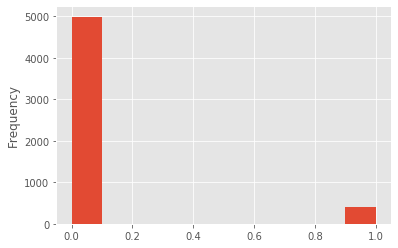

In [31]:
# Draw the value
df_train['Y'].astype(int).plot.hist()

In [37]:
# Examine missing data
def missing_data_ana(df):
    #Total missing value
    mis_val = df.isnull().sum()
    
    #Percentage of missing value
    mis_val_percentage = 100 * df.isnull().sum()/len(df)
    
    #Make a table of the result
    mis_val_table = pd.concat([mis_val, mis_val_percentage], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    #Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    #Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" + "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    #Return the dataframe with missing information 
    return mis_val_table_ren_columns
    
 

In [39]:
# See the missing values 
missing_values = missing_data_ana(df_train)
missing_values

Your selected dataframe has 19 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Prod_Closed_Date,4206,78.2
Number_Of_Dependant,2,0.0
Net_Annual_Income,2,0.0
Years_At_Business,2,0.0


In [32]:
df_train['P_Client']

0       NP_Client
1        P_Client
2       NP_Client
3       NP_Client
4       NP_Client
          ...    
5375    NP_Client
5376    NP_Client
5377    NP_Client
5378    NP_Client
5379    NP_Client
Name: P_Client, Length: 5380, dtype: object

In [34]:
df_train['Prod_Sub_Category']

0       C
1       C
2       C
3       C
4       C
       ..
5375    G
5376    C
5377    C
5378    G
5379    C
Name: Prod_Sub_Category, Length: 5380, dtype: object

In [44]:
df_train['Prod_Decision_Date']

0       14/02/2012
1       30/06/2011
2       04/04/2012
3       07/09/2011
4       11/01/2012
           ...    
5375    25/11/2011
5376    11/07/2011
5377    16/08/2011
5378    19/01/2012
5379    24/10/2011
Name: Prod_Decision_Date, Length: 5380, dtype: object